<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/23_lstm_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 기반 예측



# ✅ 🔹 LSTM 기반 테슬라 주가 예측 코드

/tmp/ipython-input-1823067941.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2306 - val_loss: 0.1312
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1890 - val_loss: 0.0659
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1413 - val_loss: 0.0215
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0968 - val_loss: 0.0044
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0736 - val_loss: 0.0074
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0783 - val_loss: 0.0106
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0715 - val_loss: 0.0081
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - val_loss: 0.0073
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - val_loss: 0.0055
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - val_loss: 0.0044
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - val_loss: 0.0037
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

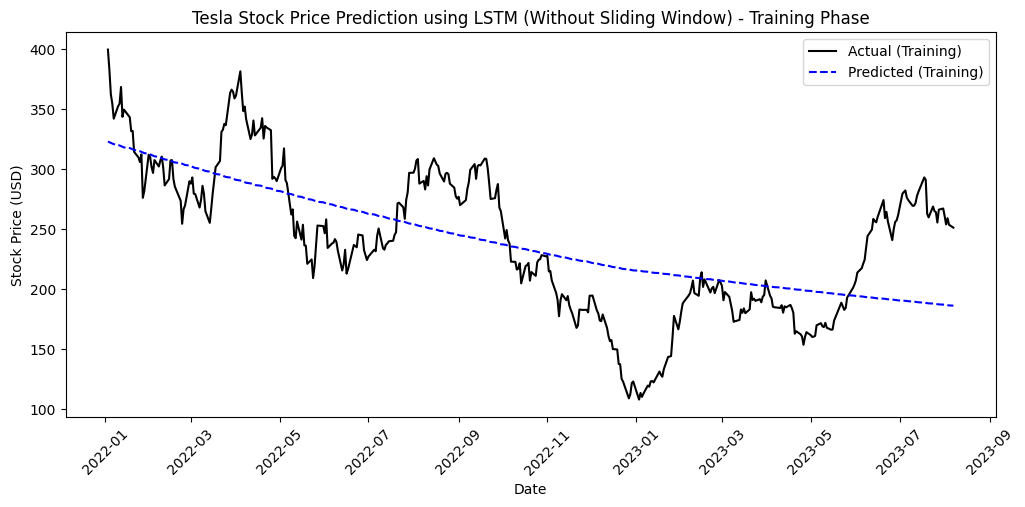

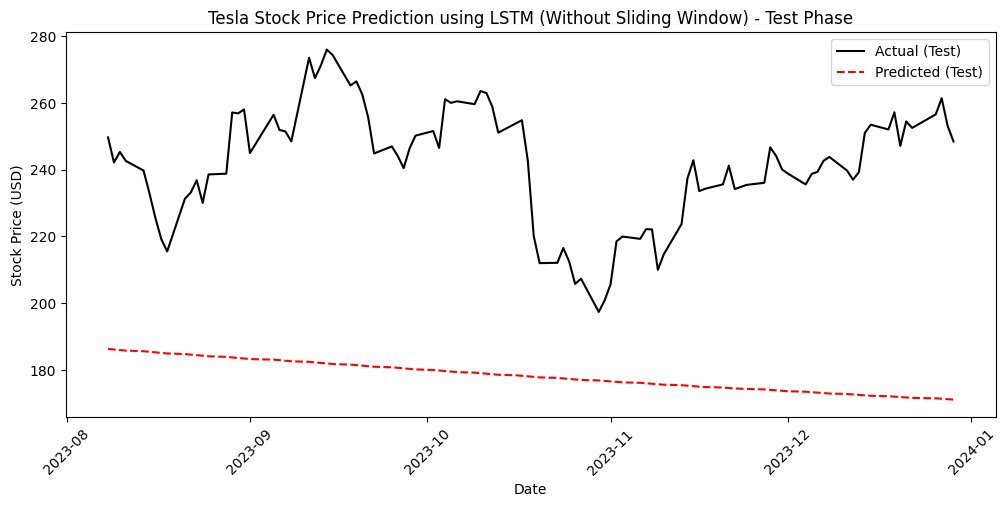

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜(Day)를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 독립 변수(X) 및 종속 변수(y) 정의
X = df[["Day"]].values  # 날짜(Day)를 입력 변수로 사용
y = df["Close"].values  # 종가(Close)를 예측할 목표 변수로 사용

# 데이터 정규화 (MinMaxScaler 사용)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 📌 4️⃣ 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# LSTM 입력 형식 변환 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)

# 📌 5️⃣ LSTM 모델 생성
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),  # LSTM 레이어
    Dense(1)  # 출력층
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 6️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 📌 8️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Without Sliding Window) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Without Sliding Window) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


#✅ 🚀 Sliding Window 적용된 LSTM 기반 테슬라 주가 예측 코드:

/tmp/ipython-input-2328917742.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1390 - val_loss: 0.0152
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - val_loss: 0.0025
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - val_loss: 0.0026
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

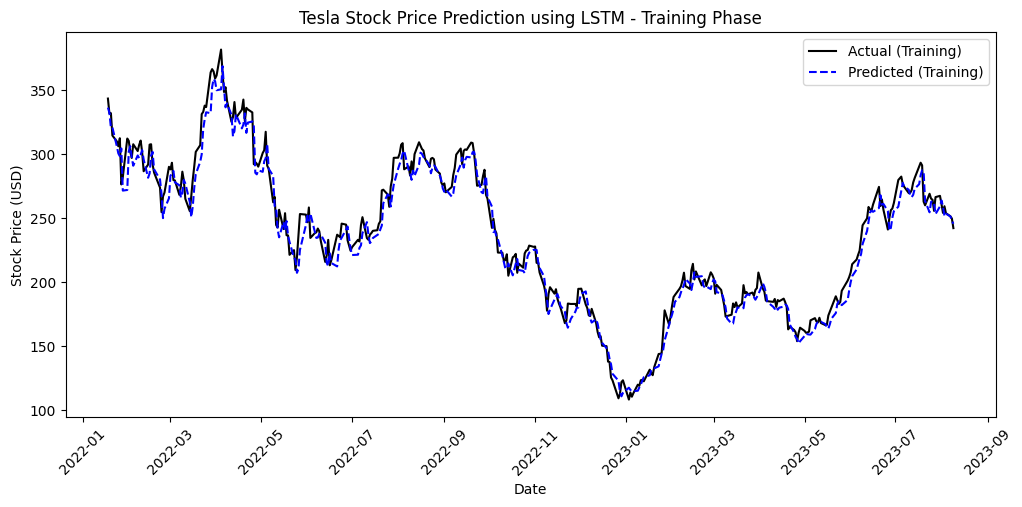

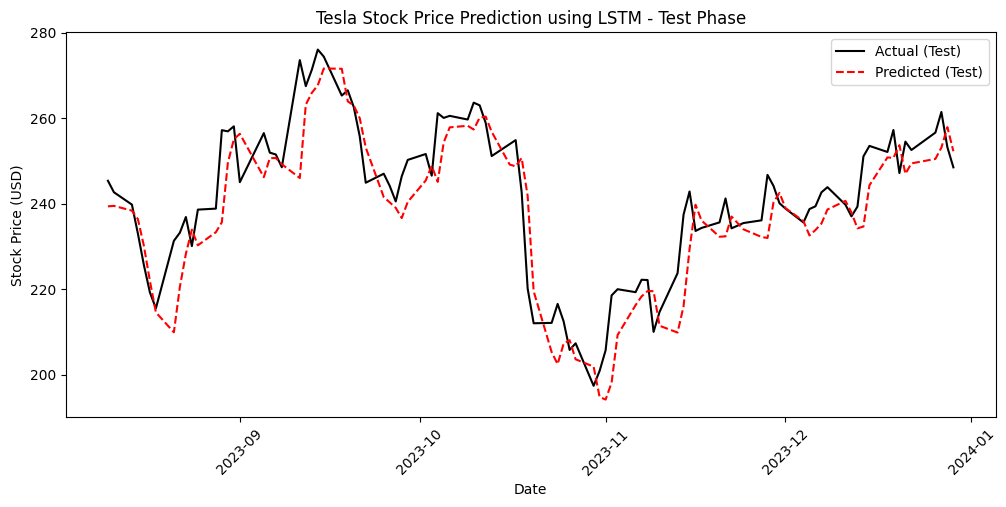

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 슬라이딩 윈도우 함수 생성
def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # 과거 window_size만큼의 데이터
        y.append(data[i + window_size])  # 예측할 값 (다음날 종가)
    return np.array(X), np.array(y)

# 📌 3️⃣ 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# 슬라이딩 윈도우 적용
window_size = 10  # 과거 10일 데이터로 미래 1일 예측
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 4️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 입력 데이터를 LSTM 입력 형식 (samples, time steps, features)으로 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 📌 5️⃣ LSTM 모델 생성
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),  # 첫 번째 LSTM 레이어
    LSTM(50, activation='relu', return_sequences=False),  # 두 번째 LSTM 레이어
    Dense(1)  # 출력층
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 6️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 8️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 🚀 하이퍼파라미터 튜닝이 적용된 LSTM 기반 테슬라 주가 예측 코드

In [3]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.8 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 54s]
val_loss: 0.0023589731814960637

Best val_loss So Far: 0.000819543298954765
Total elapsed time: 00h 10m 14s
📌 최적의 하이퍼파라미터: {'units': 128, 'activation': 'relu', 'learning_rate': 0.001}
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.1355 - val_loss: 0.0068
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080 - val_loss: 0.0021
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 10/1

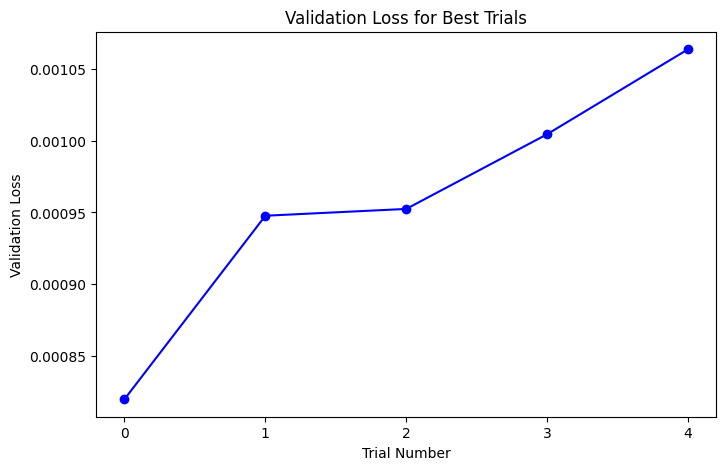

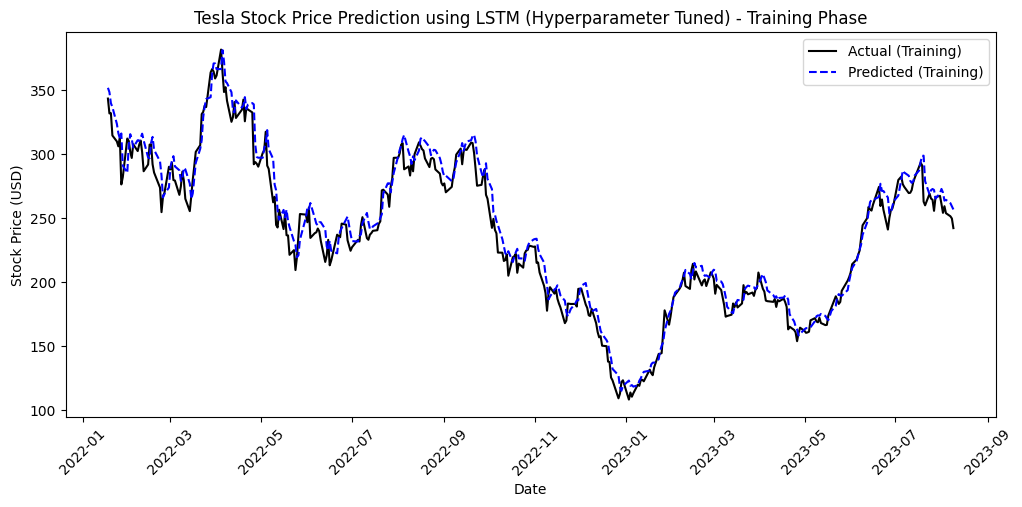

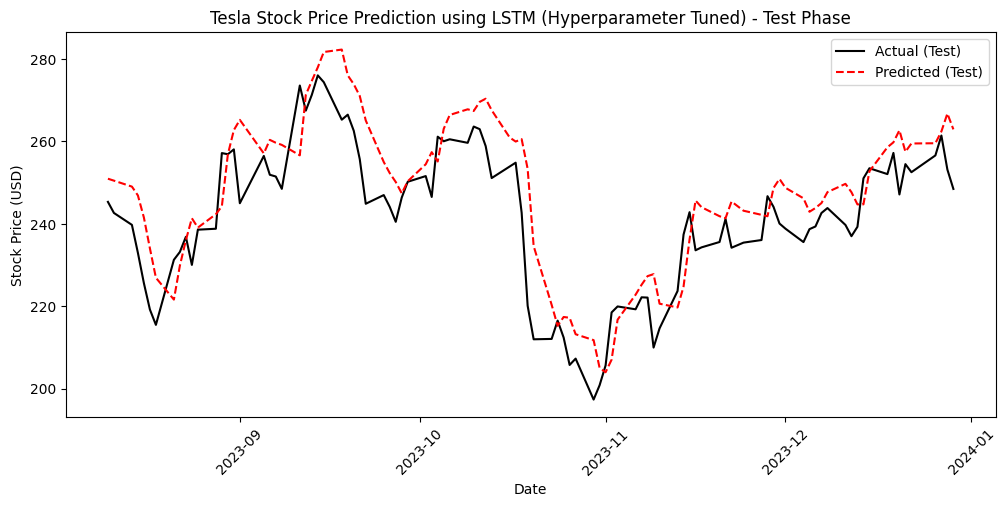

In [4]:
import os
import shutil
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt  # KerasTuner 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 📌 기존 하이퍼파라미터 튜닝 파일 삭제 (새로운 탐색을 위해)
tuner_dir = "hyperparameter_tuning/Tesla_LSTM_Tuning"
shutil.rmtree(tuner_dir, ignore_errors=True)

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 입력 변수(X) 및 출력 변수(y) 생성 (슬라이딩 윈도우)
window_size = 10  # 과거 10일치 데이터를 입력으로 사용

def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # window_size 만큼의 과거 데이터
        y.append(data[i + window_size])  # 다음날 주가 (타겟)
    return np.array(X), np.array(y)

# `Close`(종가) 데이터를 정규화
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Sliding Window 적용
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 3️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 입력 데이터를 LSTM 입력 형식 (samples, time steps, features)으로 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 📌 4️⃣ 하이퍼파라미터 튜닝을 위한 모델 정의
def build_model(hp):
    model = Sequential()

    # ✅ LSTM 레이어 유닛 수 최적화
    model.add(LSTM(
        hp.Int('units', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation', values=['relu', 'tanh']),
        input_shape=(window_size, 1)
    ))

    model.add(Dense(1))  # 출력층

    # ✅ 학습률 최적화
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mse'
    )

    return model

# 📌 5️⃣ KerasTuner를 사용한 하이퍼파라미터 튜닝
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # 시도할 모델 개수 증가
    executions_per_trial=3,  # 여러 번 실행 후 최적값 선택
    directory='hyperparameter_tuning',
    project_name='Tesla_LSTM_Tuning'
)

# 📌 6️⃣ 최적의 하이퍼파라미터 찾기
tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 최적 모델 선택
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"📌 최적의 하이퍼파라미터: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

# 📌 8️⃣ 최적 모델 학습
history = best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 🔟 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ✅ 📌 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 1️⃣1️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 1️⃣2️⃣ 최적 하이퍼파라미터 성능 시각화
best_trials = tuner.oracle.get_best_trials(num_trials=5)
trial_numbers = range(len(best_trials))
val_losses = [trial.metrics.get_best_value('val_loss') for trial in best_trials]

plt.figure(figsize=(8, 5))
plt.plot(trial_numbers, val_losses, marker='o', linestyle='-', color="blue")
plt.xlabel("Trial Number")
plt.ylabel("Validation Loss")
plt.title("Validation Loss for Best Trials")
plt.xticks(trial_numbers)
plt.show()

# 📌 1️⃣3️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Hyperparameter Tuned) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣4️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Hyperparameter Tuned) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


[INFO] LSTM, units=32, lookback=12 (eff=1), samples(seq)=490, test_size=60, rolling_window=120


,MAE,RMSE,MAPE(%),R2
Full-Series (IS all),0.1915,0.2196,6.494590e+10,-0.4684
Full-Series (IS test),0.2807,0.2844,6.429220e+01,-20.9289
Fixed-Origin,0.2913,0.2959,6.673320e+01,-22.7410
Rolling,0.3858,0.3974,8.845440e+01,-41.8255
Expanding,0.2814,0.2854,6.432890e+01,-21.0917


,y_true,full_series(IS),fixed_origin,rolling,expanding
2023-09-21,0.520686,0.189827,0.183667,0.130007,0.155971
2023-09-22,0.522331,0.208597,0.195720,0.146303,0.212180
2023-09-25,0.519384,0.229633,0.216024,0.196199,0.196389
2023-09-26,0.532919,0.238811,0.232495,0.210885,0.196295
2023-09-27,0.530760,0.239913,0.230250,0.160331,0.186685


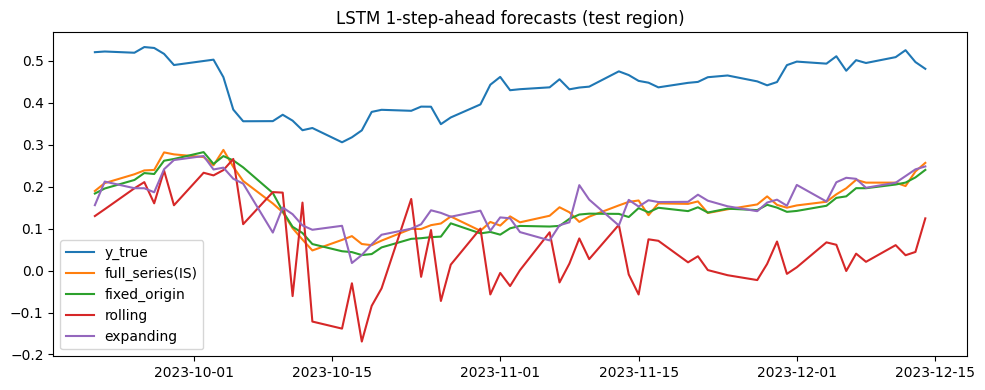

In [5]:
# ===============================================================
# LSTM 시계열 예측 - 4 스킴 “올인원 한 셀” (x축=날짜)
#   1) Full-series (내표본)
#   2) Fixed-origin (정적 파라미터, 1-스텝 OOS)
#   3) Rolling window (리핏, 1-스텝 OOS)
#   4) Expanding window (리핏, 1-스텝 OOS)
#
# 안전장치/특징
# - df / y / X 자동 감지 (없으면 df에서 y/X/Date 자동 선택)
# - df['Close']가 DataFrame(중복 컬럼)이어도 첫 컬럼 안전 선택
# - y가 (n,1) / 2D여도 1D로 자동 변환
# - X가 3D((n,lag,feat))여도 2D로 평탄화하고 LOOKBACK=1로 자동 조정 (이중 윈도 방지)
# - X 없으면 fallback: lag1(AR1) → 실패 시 trend(t)
# - 스케일러는 “훈련구간”에만 fit (데이터 누출 방지)
# - 테스트는 “마지막 TEST_SIZE개 타깃 시점”
# - x축 = 날짜(DatetimeIndex 또는 DATE_COL)
# ===============================================================
from typing import Optional, Dict, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# --- sklearn (지표/스케일) ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# --- TensorFlow (LSTM) ---
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, callbacks
except Exception as e:
    raise RuntimeError(
        "TensorFlow를 불러오지 못했습니다. 먼저 다음을 실행하세요:\n"
        "  !pip install tensorflow\n"
        f"(원인: {repr(e)})"
    )

# --------------------------
# ★ 필요 시 여기만 수정 ★
# --------------------------
UNITS           = 32
DROPOUT         = 0.0          # 0~0.5 권장 (출력 직후 Dropout)
EPOCHS          = 5            # 롤링/확장에서는 여러 번 학습되므로 과대 설정 금물
BATCH_SIZE      = 32
LOOKBACK        = 12           # 입력 시퀀스 길이(타임스텝)
TEST_SIZE       = 60           # “마지막 TEST_SIZE개”로 평가
ROLLING_WINDOW  = None         # None이면 자동(min(120, 학습길이-LOOKBACK))
DATE_COL: Optional[str] = "Date"  # df에 날짜 컬럼명이 있다면 지정(없으면 None)

# df에서 명시적으로 타깃/설명 컬럼 지정 (미지정 시 자동 감지)
Y_COL:    Optional[str]       = None        # 예: "Close"
X_COLS:   Optional[List[str]] = None        # 예: ["Day"] 또는 ["x1","x2"]; None이면 자동 감지

# 재현성(가능한 범위)
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ------------------------------------------------------------
# 유틸: 지표/변환/시퀀스/모델
# ------------------------------------------------------------
def _safe_rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def _metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    eps = 1e-12
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": _safe_rmse(y_true, y_pred),
        "MAPE(%)": float(np.mean(np.abs((y_true - y_pred) / np.where(np.abs(y_true)<eps, eps, y_true))) * 100.0),
        "R2": r2_score(y_true, y_pred),
    }

def _to_series_1d(obj, name="y") -> pd.Series:
    """무엇이든 1차원 Series로 변환"""
    if isinstance(obj, pd.Series):
        s = obj
    elif isinstance(obj, pd.DataFrame):
        s = obj.iloc[:, 0]
    else:
        arr = np.asarray(obj)
        if arr.ndim == 0:
            arr = arr.reshape(1)
        if arr.ndim > 1:
            arr = arr.reshape(-1)
        s = pd.Series(arr)
    return pd.to_numeric(s, errors="coerce").rename(name)

def _to_frame_2d(obj) -> pd.DataFrame:
    """
    무엇이든 2D DataFrame으로 변환.
    - 1D → (n,1)
    - 2D → 그대로
    - 3D 이상 → (n, prod(other_dims))로 평탄화
    """
    if isinstance(obj, pd.DataFrame):
        df = obj.copy()
    elif isinstance(obj, pd.Series):
        df = obj.to_frame(name=getattr(obj, "name", "x"))
    else:
        arr = np.asarray(obj)
        if arr.ndim == 1:
            arr = arr.reshape(-1, 1)
        elif arr.ndim >= 3:
            arr = arr.reshape(arr.shape[0], -1)
        df = pd.DataFrame(arr, columns=[f"x{i}" for i in range(arr.shape[1])])
    return df.apply(pd.to_numeric, errors="coerce")

def _get_series_from_col(df: pd.DataFrame, colname: str) -> pd.Series:
    obj = df[colname]
    if isinstance(obj, pd.DataFrame):
        return pd.to_numeric(obj.iloc[:, 0], errors="coerce")
    return pd.to_numeric(obj, errors="coerce")

def _auto_pick_from_df(df: pd.DataFrame,
                       y_col: Optional[str],
                       x_cols: Optional[List[str]],
                       date_col: Optional[str]):
    """df에서 y / X(여러 컬럼 가능) / 날짜 자동 선택"""
    # 날짜
    idx = df.index
    date_idx = None
    if isinstance(idx, pd.DatetimeIndex):
        date_idx = idx
    elif date_col and date_col in df.columns:
        try:
            date_idx = pd.to_datetime(_get_series_from_col(df, date_col), errors="coerce")
        except Exception:
            date_idx = None

    # y
    y_label = None
    if y_col and y_col in df.columns:
        y_series = _get_series_from_col(df, y_col).rename("y"); y_label = y_col
    else:
        y_series = None
        for c in ["y","Y","target","Target","Close","close","value","Value"]:
            if c in df.columns:
                y_series = _get_series_from_col(df, c).rename("y"); y_label = c; break
        if y_series is None:
            for c in df.columns:  # 첫 숫자형
                s = _get_series_from_col(df, c)
                if pd.api.types.is_numeric_dtype(s):
                    y_series = s.rename("y"); y_label = c; break
            if y_series is None:
                raise ValueError("df에서 y로 사용할 숫자형 컬럼을 찾지 못했습니다. Y_COL을 지정하세요.")

    # X (여러 컬럼 가능)
    X_df = None
    if x_cols:
        cols_ok = []
        for c in x_cols:
            if c in df.columns and c != y_label:
                s = _get_series_from_col(df, c)
                if pd.api.types.is_numeric_dtype(s):
                    cols_ok.append(c)
        if cols_ok:
            X_df = pd.concat([_get_series_from_col(df, c).rename(c) for c in cols_ok], axis=1)
    else:
        if "Day" in df.columns and "Day" != y_label:
            s = _get_series_from_col(df, "Day")
            if pd.api.types.is_numeric_dtype(s): X_df = s.to_frame("Day")
        if X_df is None and "x" in df.columns and "x" != y_label:
            s = _get_series_from_col(df, "x")
            if pd.api.types.is_numeric_dtype(s): X_df = s.to_frame("x")
        if X_df is None:
            for c in df.columns:
                if c == y_label: continue
                s = _get_series_from_col(df, c)
                if pd.api.types.is_numeric_dtype(s):
                    X_df = s.to_frame(c); break

    # 날짜 인덱스 적용
    if date_idx is not None:
        y_series.index = date_idx
        if X_df is not None: X_df.index = date_idx

    return y_series, X_df, date_idx

def _build_fallback_X(y: pd.Series) -> pd.DataFrame:
    """X가 없을 때: lag1 또는 trend(t) 단일 특징 생성"""
    lag1 = y.shift(1).rename("lag1")
    if lag1.dropna().shape[0] >= 10:
        return lag1.to_frame()
    t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
    return t.to_frame()

def _make_sequences(y: pd.Series,
                    X_df: Optional[pd.DataFrame],
                    lookback: int):
    """
    (y, X_df) → (X_seq, y_target, idx_target)
    - X_seq shape: (samples, timesteps, features)  # features = 1(+y) + (#X)
    """
    yv = pd.to_numeric(y, errors="coerce").to_numpy()
    if X_df is not None:
        Xv = X_df.apply(pd.to_numeric, errors="coerce").to_numpy()
        k = X_df.shape[1]
    else:
        Xv = None; k = 0

    n = len(yv)
    X_list, y_list, idx_list = [], [], []

    for i in range(lookback, n):
        y_win = yv[i-lookback:i]                    # (L,)
        if np.any(np.isnan(y_win)) or np.isnan(yv[i]): continue
        if Xv is not None:
            X_win = Xv[i-lookback:i, :]            # (L, k)
            if np.any(np.isnan(X_win)): continue
            seq = np.concatenate([y_win[:, None], X_win], axis=1)  # (L, 1+k)
        else:
            seq = y_win[:, None]                   # (L, 1)

        X_list.append(seq)
        y_list.append(yv[i])
        idx_list.append(y.index[i])

    X_seq = np.array(X_list, dtype=float)          # (m, L, F)
    y_tar = np.array(y_list, dtype=float)          # (m,)
    idx = pd.Index(idx_list)

    return X_seq, y_tar, idx

def _fit_transform_train(X_seq_train: np.ndarray):
    """(m,L,F) → 스케일러 fit (train 전용), 변환된 (m,L,F) 반환"""
    m, L, F = X_seq_train.shape
    scaler = StandardScaler()
    flat = X_seq_train.reshape(-1, F)
    flat_scaled = scaler.fit_transform(flat)
    return flat_scaled.reshape(m, L, F), scaler

def _transform_with(X_seq: np.ndarray, scaler: StandardScaler):
    m, L, F = X_seq.shape
    return scaler.transform(X_seq.reshape(-1, F)).reshape(m, L, F)

# === LSTM 모델(Functional API: Keras 3 권고 준수) ===
def _build_model(input_shape, units=32, dropout=0.0):
    """
    input_shape: (timesteps, features)
    """
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(units)(inputs)   # ← LSTM 고정
    if dropout and dropout > 0:
        x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1)(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse")
    return model

def _train_predict(X_tr, y_tr, X_te, units, dropout, epochs, batch_size, verbose=0):
    model = _build_model(X_tr.shape[1:], units=units, dropout=dropout)
    es = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=0)
    model.fit(X_tr, y_tr,
              validation_split=0.1 if len(X_tr) > 20 else 0.0,
              epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=[es])
    return model.predict(X_te, verbose=0).reshape(-1)

# ------------------------------------------------------------
# 0) 데이터 자동 감지 (df, y, X → 우선 사용, 날짜 인덱스 우선)
# ------------------------------------------------------------
y_series: Optional[pd.Series]        = None
X_raw: Optional[pd.DataFrame]        = None
date_index: Optional[pd.DatetimeIndex] = None
LOOKBACK_EFF = LOOKBACK  # X가 3D였으면 1로 자동 조정
_glob = globals()

# 0-1) y / X 가 이미 존재하면 우선 사용
if "y" in _glob:
    y_series = _to_series_1d(_glob["y"], name="y")

if "X" in _glob:
    X_obj = _glob["X"]
    if not isinstance(X_obj, pd.DataFrame):
        arr = np.asarray(X_obj)
        if arr.ndim >= 3:
            LOOKBACK_EFF = 1  # X가 이미 윈도잉돼 있으면 내부 lookback을 1로
    X_raw = _to_frame_2d(X_obj)

# y/X 길이·인덱스 정렬
if y_series is not None and X_raw is not None:
    m = min(len(y_series), len(X_raw))
    y_series = y_series.iloc[:m]
    X_raw    = X_raw.iloc[:m, :]
    X_raw.index = y_series.index

# 0-2) df 에서 자동 추출
if y_series is None or X_raw is None:
    if "df" in _glob:
        _df = _glob["df"].copy()
        y2, X2, dt_idx = _auto_pick_from_df(_df, Y_COL, X_COLS, DATE_COL)
        if y_series is None: y_series = y2
        if X_raw is None and X2 is not None: X_raw = X2
        if date_index is None: date_index = dt_idx

# 0-3) 날짜 인덱스 보강
if date_index is None and "df" in _glob and DATE_COL and DATE_COL in _glob["df"].columns:
    _date_obj = _glob["df"][DATE_COL]
    if isinstance(_date_obj, pd.DataFrame): _date_obj = _date_obj.iloc[:,0]
    try:
        date_index = pd.to_datetime(_date_obj, errors="coerce")
    except Exception:
        date_index = None

if date_index is not None:
    if y_series is not None: y_series.index = date_index[:len(y_series)]
    if X_raw is not None:    X_raw.index    = date_index[:len(X_raw)]

# 0-4) X 없으면 fallback 특징 생성
if X_raw is None:
    if y_series is None:
        raise RuntimeError("타깃 y를 찾지 못했습니다. df/Y_COL 또는 y 변수를 준비해 주세요.")
    X_raw = _build_fallback_X(y_series)

# 정렬 & 정합
if isinstance(y_series.index, pd.DatetimeIndex):
    y_series = y_series.sort_index()
    X_raw = X_raw.reindex(y_series.index).sort_index()
else:
    X_raw = X_raw.reindex(y_series.index)

# 결측 제거(둘 다 유효한 시점만)
valid = ~(X_raw.isna().any(axis=1) | y_series.isna())
y_series = y_series.loc[valid]
X_raw    = X_raw.loc[valid].astype(float)

# ------------------------------------------------------------
# 1) 시퀀스 생성 (LOOKBACK_EFF 사용)
# ------------------------------------------------------------
X_seq_all, y_all, idx_all = _make_sequences(y_series, X_raw, LOOKBACK_EFF)
if len(y_all) < max(TEST_SIZE + 5, 10):
    raise RuntimeError(
        f"시퀀스 표본이 부족합니다. (현재 {len(y_all)}개)  "
        f"LOOKBACK({LOOKBACK})/TEST_SIZE({TEST_SIZE})를 조정해 보세요. "
        f"(X가 3D여서 자동으로 LOOKBACK을 {LOOKBACK_EFF}로 적용했을 수 있습니다)"
    )

# 테스트 시작 위치 = 마지막 TEST_SIZE개
test_start_pos = max(0, len(y_all) - TEST_SIZE)
test_index = idx_all[test_start_pos:]         # 날짜 인덱스(테스트 구간)
y_true_test = y_all[test_start_pos:]

# ------------------------------------------------------------
# 2) 4 스킴 실행 (모두 LSTM)
# ------------------------------------------------------------
# Full-series (내표본)
X_is, scaler_is = _fit_transform_train(X_seq_all)
yhat_is_all = _train_predict(X_is, y_all, X_is, UNITS, DROPOUT, EPOCHS, BATCH_SIZE, verbose=0)
yhat_is_test = yhat_is_all[test_start_pos:]

# Fixed-origin (정적 파라미터)
X_tr_fo_raw = X_seq_all[:test_start_pos]; y_tr_fo = y_all[:test_start_pos]
X_te_fo_raw = X_seq_all[test_start_pos:]
X_tr_fo, scaler_fo = _fit_transform_train(X_tr_fo_raw)
X_te_fo = _transform_with(X_te_fo_raw, scaler_fo)
yhat_fo = _train_predict(X_tr_fo, y_tr_fo, X_te_fo, UNITS, DROPOUT, EPOCHS, BATCH_SIZE, verbose=0)

# Rolling window
if ROLLING_WINDOW is None:
    ROLLING_WINDOW = min(120, test_start_pos if test_start_pos>0 else 120)
yhat_rw = []
for tpos in range(test_start_pos, len(y_all)):
    tr_start = max(0, tpos - ROLLING_WINDOW)
    X_tr_rw_raw = X_seq_all[tr_start:tpos]; y_tr_rw = y_all[tr_start:tpos]
    X_te_rw_raw = X_seq_all[tpos:tpos+1]
    X_tr_rw, scaler_rw = _fit_transform_train(X_tr_rw_raw)
    X_te_rw = _transform_with(X_te_rw_raw, scaler_rw)
    pred = _train_predict(X_tr_rw, y_tr_rw, X_te_rw, UNITS, DROPOUT, EPOCHS, BATCH_SIZE, verbose=0)[0]
    yhat_rw.append(pred)
yhat_rw = np.array(yhat_rw)

# Expanding window
yhat_ex = []
for tpos in range(test_start_pos, len(y_all)):
    X_tr_ex_raw = X_seq_all[:tpos]; y_tr_ex = y_all[:tpos]
    X_te_ex_raw = X_seq_all[tpos:tpos+1]
    X_tr_ex, scaler_ex = _fit_transform_train(X_tr_ex_raw)
    X_te_ex = _transform_with(X_te_ex_raw, scaler_ex)
    pred = _train_predict(X_tr_ex, y_tr_ex, X_te_ex, UNITS, DROPOUT, EPOCHS, BATCH_SIZE, verbose=0)[0]
    yhat_ex.append(pred)
yhat_ex = np.array(yhat_ex)

# ------------------------------------------------------------
# 3) 결과 취합 & 지표
# ------------------------------------------------------------
preds = pd.DataFrame(index=test_index)
preds["y_true"]            = y_true_test
preds["full_series(IS)"]   = yhat_is_test
preds["fixed_origin"]      = yhat_fo
preds["rolling"]           = yhat_rw
preds["expanding"]         = yhat_ex

metrics = pd.DataFrame({
    "Full-Series (IS all)" : _metrics(y_all, yhat_is_all),
    "Full-Series (IS test)": _metrics(preds["y_true"].to_numpy(), preds["full_series(IS)"].to_numpy()),
    "Fixed-Origin"         : _metrics(preds["y_true"].to_numpy(), preds["fixed_origin"].to_numpy()),
    "Rolling"              : _metrics(preds["y_true"].to_numpy(), preds["rolling"].to_numpy()),
    "Expanding"            : _metrics(preds["y_true"].to_numpy(), preds["expanding"].to_numpy()),
}).T

# ------------------------------------------------------------
# 4) 표시 및 플롯 (x축=날짜)
# ------------------------------------------------------------
print(f"[INFO] LSTM, units={UNITS}, lookback={LOOKBACK} (eff={LOOKBACK_EFF}), "
      f"samples(seq)={len(y_all)}, test_size={TEST_SIZE}, rolling_window={ROLLING_WINDOW}")
display(metrics.round(4))
display(preds.head())

# 날짜 x축 플롯
x_idx = preds.index
try:
    x_idx = pd.to_datetime(x_idx)
except Exception:
    if "df" in globals() and DATE_COL and DATE_COL in globals()["df"].columns:
        _dt = globals()["df"][DATE_COL]
        if isinstance(_dt, pd.DataFrame): _dt = _dt.iloc[:,0]
        x_idx = pd.to_datetime(_dt.iloc[-len(preds):].values, errors="coerce")

plt.figure(figsize=(10,4))
plt.plot(x_idx, preds["y_true"], label="y_true")
plt.plot(x_idx, preds["full_series(IS)"], label="full_series(IS)")
plt.plot(x_idx, preds["fixed_origin"], label="fixed_origin")
plt.plot(x_idx, preds["rolling"], label="rolling")
plt.plot(x_idx, preds["expanding"], label="expanding")
plt.title("LSTM 1-step-ahead forecasts (test region)")
plt.legend()
plt.tight_layout()
plt.show()

# (원하면) 저장
# preds.to_csv("forecast_preds_lstm.csv", index=True)
# metrics.to_csv("forecast_metrics_lstm.csv", index=True)
# print("[INFO] saved: forecast_preds_lstm.csv, forecast_metrics_lstm.csv")
